## Beginner Machine Learning (ML) Project to understand ML Linear Regression Working

In [1]:
#importing important libraries and modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# reading the dataset from a csv file
df = pd.read_csv('Price Area DataSet.csv')

In [3]:
df.head() # checking the head of the data (First 5 records)

,area (sq. meters),price (USD)
0,100,5000
1,101,5050
2,102,5100
3,103,5150
4,104,5200


In [4]:
df.tail() # checking the last 5 records

,area (sq. meters),price (USD)
46,146,7300
47,147,7350
48,148,7400
49,149,7450
50,150,7500


In [5]:
# we have 51 records in our dataset, lets check more info on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   area (sq. meters)  51 non-null     int64
 1    price (USD)       51 non-null     int64
dtypes: int64(2)
memory usage: 944.0 bytes


### Visualizing the Data

In [6]:
# to visualize the plots in notebook
%matplotlib inline

In [7]:
df.columns # to see the columns

Index(['area (sq. meters)', ' price (USD)'], dtype='object')

Text(0.5, 1.0, 'Scatter Plot of Area Againt Price')

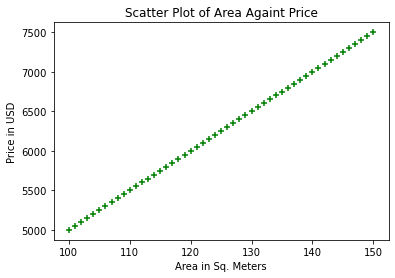

In [8]:
# Visualizing using scatter plots
plt.scatter(df['area (sq. meters)'],df[' price (USD)'], marker='+', color='g') # marker to change the pointer and 'g' to give give it green color 
plt.xlabel('Area in Sq. Meters')
plt.ylabel('Price in USD')
plt.title('Scatter Plot of Area Againt Price')

In [9]:
# The visualization above may not be neccesary. but with the plot, it shows our model will likely be more accurate
# Assigning x and y
X = df[['area (sq. meters)']] # x has to be 2 dimension, hence we use [[]]
y = df[' price (USD)']

In [10]:
# importing test/train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=20)
# using 'random_state' makes sure we always get the same sample all the time

### Checking the X and y Train and Test data

In [11]:
X_test

,area (sq. meters)
47,147
4,104
38,138
18,118
46,146
43,143
29,129
12,112
17,117
8,108


In [12]:
X_train

,area (sq. meters)
41,141
0,100
14,114
39,139
25,125
24,124
10,110
3,103
42,142
13,113


In [13]:
y_test

47    7350
4     5200
38    6900
18    5900
46    7300
43    7150
29    6450
12    5600
17    5850
8     5400
1     5050
23    6150
27    6350
48    7400
50    7500
37    6850
Name:  price (USD), dtype: int64

In [14]:
y_train

41    7050
0     5000
14    5700
39    6950
25    6250
24    6200
10    5500
3     5150
42    7100
13    5650
6     5300
2     5100
30    6500
40    7000
5     5250
44    7200
33    6650
16    5800
19    5950
36    6800
45    7250
21    6050
32    6600
34    6700
7     5350
22    6100
11    5550
20    6000
9     5450
49    7450
28    6400
31    6550
15    5750
26    6300
35    6750
Name:  price (USD), dtype: int64

In [15]:
#checking the shape of the test and train data
X_test.shape, X_train.shape, y_test.shape, y_train.shape

((16, 1), (35, 1), (16,), (35,))

## Using the Algorithm/Model to train

In [16]:
model = LinearRegression()
# X value has to be 2 dimension while y has to be 1 dimension because y=mx+c

In [17]:
# fitting the data into the model
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# checking the coefficient
model.coef_

array([50.])

In [19]:
# checking the intercept
model.intercept_

-3.637978807091713e-12

## Predicting with the Trained Model

In [20]:
model.predict(X_test)

array([7350., 5200., 6900., 5900., 7300., 7150., 6450., 5600., 5850.,
       5400., 5050., 6150., 6350., 7400., 7500., 6850.])

## Predicting actual area againt price

In [21]:
model.predict([[1500]])

array([75000.])

## Checking the model accuracy

In [22]:
# using score
model.score(X_test, y_test)

1.0

In [23]:
# from the indication above, our model is 100% accurate.
# this is a very perfect model because of the consistency in the data and the patterns it has

## Saving the Linear Regression Model

In [24]:
# Importing the libraries for saving the model
import pickle as pck
from joblib import dump, load

In [25]:
# Using pickle to write to a binary file
with open('pck model', 'wb') as md: #wb mean write binary
    pck.dump(model, md) # dumping model into md
    
with open('pck model', 'rb') as md: # reading the binary file / Deserializing the file
    dumped_md = pck.load(md)

In [26]:
# checking if the dumping process was succesful
dumped_md.predict([[1500]])

array([75000.])

In [27]:
# from above, the pickle dump and load was successful, now lets save it using joblib
dump(model,'joblib_prediction_save')

['joblib_prediction_save']

In [28]:
#loading the model from the file directly
loader = load('joblib_prediction_save')

In [29]:
loader.predict([[1500]])

array([75000.])

In [30]:
# From the above cell, the model was saved and loaded successfully
# This means we can always use this model anywhere so long as we have the file and we import 'load' from 'joblib'

## Using User Input to make Predictions

In [31]:
inp = input('Enter Land Area to get the Price in USD: ')

#converting inp into a 1d array
arr = np.array(inp)

farray = arr.astype(float)  # Converting the array into a float array
farray2d = ([[farray]]) # Converting farray to 2d array

print(farray2d)

Enter Land Area to get the Price in USD: 4500
[[array(4500.)]]


In [32]:
inp = input('Enter Land Area (in digits) to get the Price in USD: ')

#converting inp into a 1d array
arr = np.array(inp)

farray = arr.astype(float)  # Converting the array into a float array
farray2d = ([[farray]]) # Converting farray to 2d array

#print(farray2d)

prediction = loader.predict(farray2d) # because the 'loader' is currently holding the model through the file
#print(prediction)

# Converting the vector into scalar
price = np.asscalar(np.array(prediction))

print(f'Price for {inp} area of land in the USA is ${price}')

Enter Land Area (in digits) to get the Price in USD: 6000
Price for 6000 area of land in the USA is $300000.0000000002


<ipython-input-32-e11ee73ecd02>:15: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  price = np.asscalar(np.array(prediction))


### To Avoid having the above error lets use another method to convert to scalar

In [33]:
inp = input('Enter Land Area (in digits) to get the Price in USD: ')

#converting inp into a 1d array
arr = np.array(inp)

farray = arr.astype(float)  # Converting the array into a float array
farray2d = ([[farray]]) # Converting farray to 2d array

#print(farray2d)

prediction = loader.predict(farray2d) # because the 'loader' is currently holding the model through the file
#print(prediction)

# Converting the vector into scaler
Price = np.array(prediction)
Price = Price.item()

print(f'Price for {inp} area of land in the USA is ${Price}')

Enter Land Area (in digits) to get the Price in USD: 7500
Price for 7500 area of land in the USA is $375000.00000000023


# Congratulations, we have succesfully trained our model